# Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

In [1]:
import pandas as pd

import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})
sns.set_style('whitegrid')
sns.set_context('notebook')

import matplotlib.pyplot as plt

## Загрузка данных и подготовка их к анализу
### Чтение и описание представленных на исследование данных

In [2]:
df = pd.read_csv('moscow_rest_data.csv')
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
df.info()
display(df.duplicated().sum())
display(df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


0

92196

**Выводы:**

1. Представленные на исследование данные открылись корректно. 

2. Датсет состоит из 15366 наблюдей по 6 признакам. Всего 92196 записей.

3. Пропущенные значения - отсутвуют, явные(полные) дубликаты - отсутвуют.

4. Данные представлены следующими типами: 

- id — идентификатор объекта - int64, - целочисленный метод;
- object_name — название объекта общественного питания - object, - строковый или иной вид нечисленных данных;
- chain — сетевой ресторан - - object, - строковый или иной вид нечисленных данных;
- object_type — тип объекта общественного питания - - object, - строковый или иной вид нечисленных данных;
- address — адрес - - object, - строковый или иной вид нечисленных данных;
- number — количество посадочных мест int64, - целочисленный метод.

5. Для целей дальнейшего исследования (возможности проведения математичнских операций над данными) целесообразно зашифровать столбец chain в виде булевого типа данных, где 1 - соответсвует True, а 0 - False, при этом тип данных сформировать, как int.

### Предобработка данных

In [4]:
df['chain'] = df['chain'].replace({'да': 1, 'нет': 0}).astype(int)
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,0,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,0,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,0,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,1,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,0,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


**Вывод:**

Данные подготовлены для дальнейшго исследования.

## Анализ данных
### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график

In [5]:
rest_type = (
    df['object_type'].value_counts()
    .rename_axis('object_type')
    .to_frame('count')
    .reset_index()
    .assign(share = lambda x: (x['count'] / x['count'].sum()).round(2))
)

rest_type

,object_type,count,share
0,кафе,6099,0.40
1,столовая,2587,0.17
2,ресторан,2285,0.15
3,предприятие быстрого обслуживания,1923,0.13
4,бар,856,0.06
5,буфет,585,0.04
6,кафетерий,398,0.03
7,закусочная,360,0.02
8,магазин (отдел кулинарии),273,0.02


**Выводы**

1. Объекты питания представлены в виде кафе, столовых, ресторанов, предприятий фастфуда, баров, буфетов, кафетерий, закосочных и отделов кулинарии.
2. Подавляющее большинство объектов общественного питания представленов в качестве кафе - 6099 заведений, что составлет 40% рынка. Практически в равных количествах представлены столовые и рестораны, 2587 и 2285 соответсвенно, что суммарно составляет 32% рынка.
3. В меньшем размере представлены категории кафетерий, закусочных и отделов кулинарии, 398, 360 и 273 соответвенно, что суммарно составляет 7% рынка.

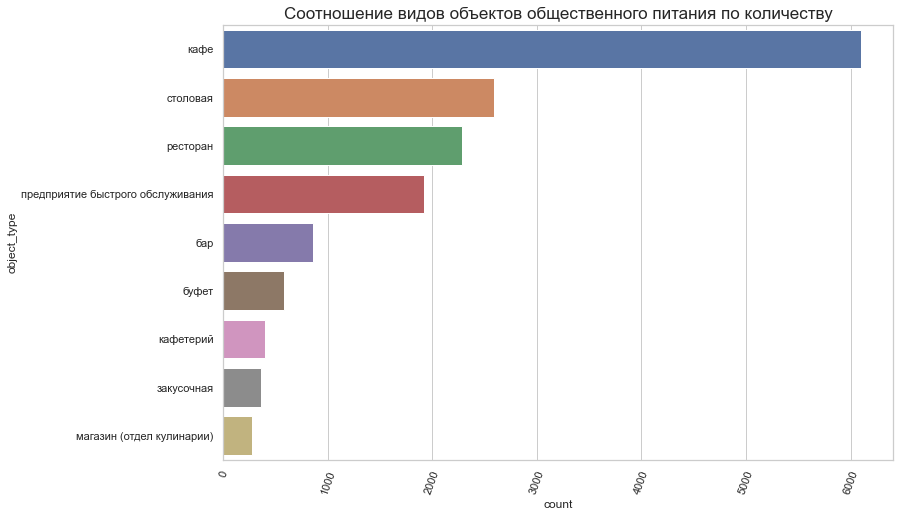

In [6]:
sns.barplot(data=rest_type, y='object_type', x='count')
plt.xticks(rotation=70)
plt.title('Соотношение видов объектов общественного питания по количеству', fontsize=17)
plt.show()

**Вывод**

На представленном графике отмечено явное доминирование кафе, как типа заведения общественного питания, практически равное равномерное распределение имеют столовые, рестораны и заведния фастфуда, а также буфеты, кафетерии, закусочные и отделы кулинарии.

### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график

In [7]:
rest_chain = (
    df.groupby('chain')['chain'].count()
    .to_frame()
    .rename(columns={'chain': 'count'})
    .assign(share = lambda x: (x['count'] / x['count'].sum()).round(2))
    .reset_index()
)

rest_chain['chain'] = rest_chain['chain'].replace({1: 'сетевые заведения', 0: 'локальные заведения'})

rest_chain

,chain,count,share
0,локальные заведения,12398,0.81
1,сетевые заведения,2968,0.19


**Вывод**

Несетевые заведения составляют 81% рынка или 12398 объектов, сетевые заведения 19% рынка или 2968 объектов.

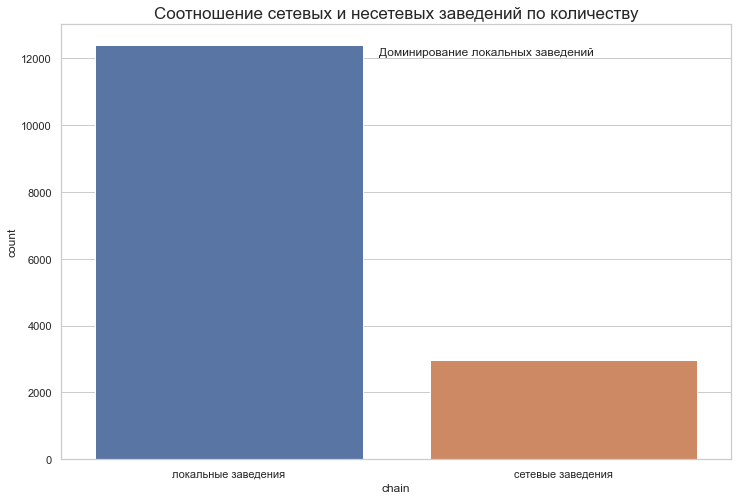

In [8]:
sns.barplot(data=rest_chain, x='chain', y='count')
plt.title('Соотношение сетевых и несетевых заведений по количеству', fontsize=17)
plt.text(0.45, 12100, 'Доминирование локальных заведений')
plt.show()

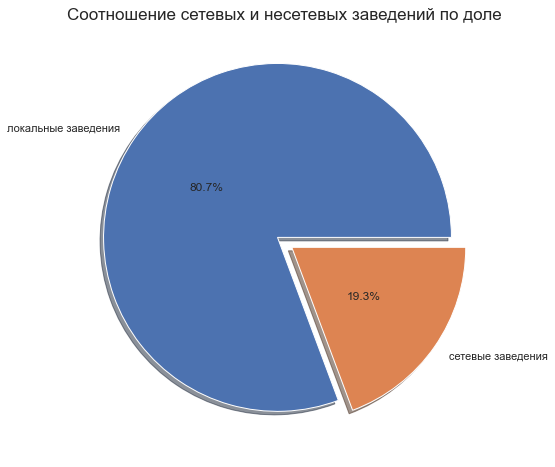

In [9]:
(
    plt.pie(x=rest_chain['count'], 
            autopct="%.1f%%", 
            explode=[0.05]*2, 
            labels=rest_chain['chain'], 
            pctdistance=0.5,  
            shadow=True)
)
plt.title('Соотношение сетевых и несетевых заведений по доле', fontsize=17)
plt.show()

**Вывод**

На графике отмечено превышение каличества локальных завеений над сетевыми.

### Для какого вида объекта общественного питания характерно сетевое распространение?

In [10]:
rest_chain_type = (
    df[df['chain'] == 1]
    .groupby('object_type')['id'].count()
    .to_frame()
    .rename(columns={'id': 'count'})
    .assign(share = lambda x: (x['count'] / x['count'].sum()).round(4))
    .sort_values(by='count', ascending=False)
    .reset_index()
)

rest_chain_type

,object_type,count,share
0,кафе,1396,0.4704
1,предприятие быстрого обслуживания,791,0.2665
2,ресторан,544,0.1833
3,магазин (отдел кулинарии),78,0.0263
4,закусочная,56,0.0189
5,кафетерий,52,0.0175
6,бар,37,0.0125
7,буфет,11,0.0037
8,столовая,3,0.0010


**Вывод**

1. 47% или 1396 объекта сетевых зававедений представлено в качестве кафе.
2. В схожих объемах, 27% и 18% сетвых заведений представлено в качестве предприятий фастфуда и ресторанов, что составляет 791 и 544 объекта соответсвенно.
3. Из сетевых заведений наименьших процент рынка (суммарно менее 2%) занимают бары, буфеты и столовые 37, 11 и 3 соответсвенно.

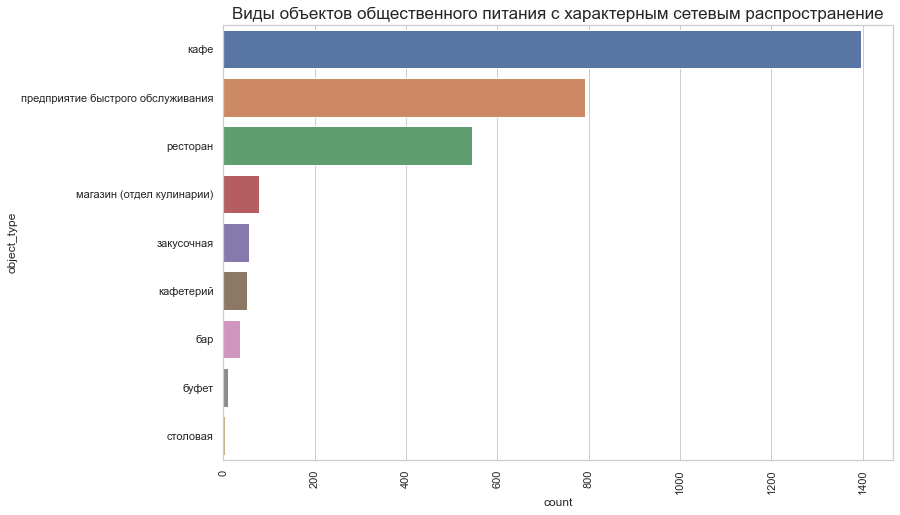

In [11]:
sns.barplot(data=rest_chain_type, y='object_type', x='count')
plt.xticks(rotation=90)
plt.title('Виды объектов общественного питания с характерным сетевым распространение', fontsize=17)
plt.show()

**Вывод**

На графике отмечено предобладание кафе, как типа сетевого заведения и равномерное распределение среди кулинарий, закусочных, кафетерий и баров, как сетевых объектов общественного питания.

In [12]:
rest_type_count_total = (
    df.groupby('object_type')['id'].count()
    .to_frame()
    .rename(columns={'id': 'rest_count_total'})
)

rest_type_chain_count = (
    df[df['chain'] == 1]
    .groupby('object_type')['id'].count()
    .to_frame()
    .rename(columns={'id': 'rest_count_chain'})
)

rest_type_chain_share = (
    rest_type_chain_count.merge(rest_type_count_total, on='object_type')
    .assign(rest_chain_share = lambda x: (x['rest_count_chain'] / x['rest_count_total']).round(2))
    .sort_values(by='rest_chain_share', ascending=False)
    .reset_index()
)

rest_type_chain_share

,object_type,rest_count_chain,rest_count_total,rest_chain_share
0,предприятие быстрого обслуживания,791,1923,0.41
1,магазин (отдел кулинарии),78,273,0.29
2,ресторан,544,2285,0.24
3,кафе,1396,6099,0.23
4,закусочная,56,360,0.16
5,кафетерий,52,398,0.13
6,бар,37,856,0.04
7,буфет,11,585,0.02
8,столовая,3,2587,0.00


**Вывод**

1. 41% предприятий фасфуда являються сетевыми.
2. Практически равномерное распределение в категории сетевые заведения в 29%, 24% и 23% имеют объекты клинарии, рестораны и кафе соответсвенно.
3. Сетевое распространение не характерно для баров, буфетов и столовых - доля указанных заведений в сети стремиться к нулю. 

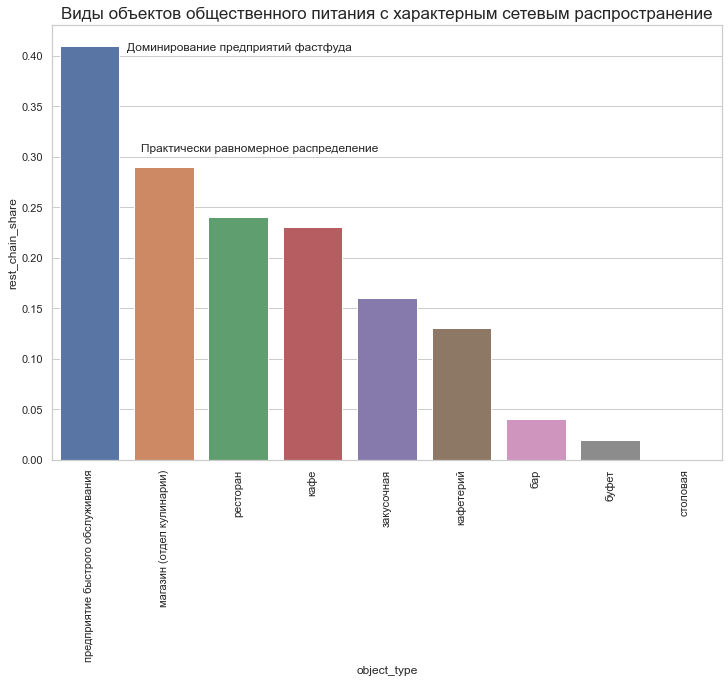

In [13]:
sns.barplot(data=rest_type_chain_share, x='object_type', y='rest_chain_share')
plt.xticks(rotation=90)
plt.title('Виды объектов общественного питания с характерным сетевым распространение', fontsize=17)
plt.text(0.5, 0.405, 'Доминирование предприятий фастфуда')
plt.text(0.7, 0.305, 'Практически равномерное распределение')
plt.show()

**Вывод**

На графике отмечено предобладание предприятий фастфуда, как типа сетевого заведения и равномерное распределение среди кулинарий, ресторанов и кафе, как сетевых объектов общественного питания. Доля баров, буфетов и столовых, как сетевых объектов, близка к нулю.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? 

In [14]:
rest_chain_type_seats = (
    df[df['chain'] == 1]
    .groupby('object_type').agg({'id': 'count', 'number': 'mean'})
    .rename(columns={'id': 'chain_rest_count', 'number': 'seats_mean'})   
    .round()
    .astype(int)
    .sort_values('seats_mean', ascending=False)
    .reset_index()
)
rest_chain_type_seats

,object_type,chain_rest_count,seats_mean
0,столовая,3,112
1,ресторан,544,100
2,бар,37,53
3,кафе,1396,47
4,предприятие быстрого обслуживания,791,40
5,закусочная,56,14
6,буфет,11,13
7,кафетерий,52,12
8,магазин (отдел кулинарии),78,9


**Вывод**

Явного паттерна по количеству заведений и среднему количеству посадочных мест для сетевых завелений выявить не представляеться возможным. 

Так, сетевые столовые представлены в количенстве трех заведений, при этом среднее количество посадочных мест составляет 112, в то же время сопоставимые по количеству средних посадочных мест на заведение - 100, сетевые рестораны имеют 544 заведения.

Кафе, - 1396 сетевых заведения имеют в среднем 47 посадочных мест, а сетевые бары, со среднем сопоставимым с кафе количеством посадочных мест в 53 имеют лишь 37 заведния.

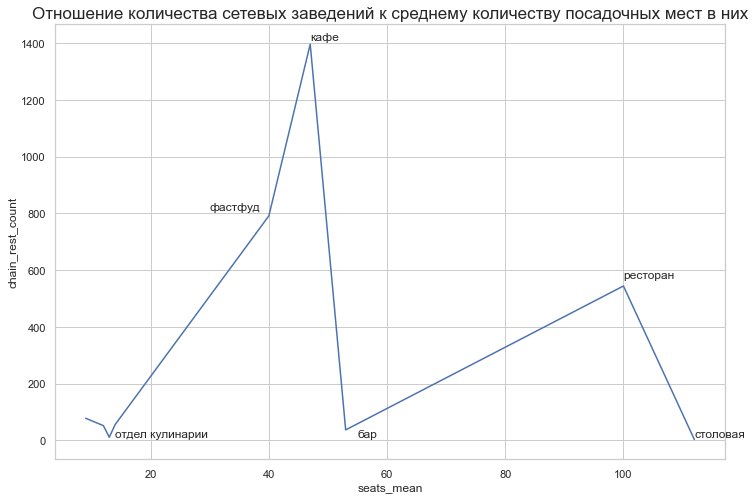

In [15]:
sns.lineplot(data=rest_chain_type_seats, x='seats_mean', y='chain_rest_count')
plt.title('Отношение количества сетевых заведений к среднему количеству посадочных мест в них', fontsize=17)
plt.text(47, 1410, 'кафе')
plt.text(14, 10, 'отдел кулинарии')
plt.text(30, 810, 'фастфуд')
plt.text(55, 10, 'бар')
plt.text(100, 570, 'ресторан')
plt.text(112, 10, 'столовая')
plt.show()

**Вывод**

На графике представлена соотношение количества заведений в сети и среднего количества посадочных мест.

Так, при увеличении количества заведений в сети, до определенного уровня, растет и среднее количество посадочных мест, что характерно для предприятий фастфуда, кафе и ресторанов.

В то же время, для кунирий, баров и столовых не характерно увеличение количества заведений в сети, размер среднего количество мест определяеться изначальным планом рассадки клиентов.

In [16]:
df.object_name = df.object_name.str.lower().str.strip()

rest_chain = (
    df[df['chain'] == 1]
    .groupby(['object_name', 'object_type']).agg({'object_name': 'count', 'number': 'sum'})
    .rename(columns={'object_name': 'rest_count', 'number': 'seats_sum'})
    .sort_values('rest_count', ascending=False)
    .query('rest_count > 2')
    .reset_index()
)


#df['binned'] = pd.cut(df['percentage'], bins=bins, labels=labels)

rest_chain['rest_chain_category'] = (
    pd.cut(rest_chain['rest_count'], 
           bins=[0, 5, 150], 
           labels=['мало заведений', 'много заведений'])
)

rest_chain['rest_chain_seats_category'] = (
    pd.cut(rest_chain['seats_sum'],
           bins=[0, 208, 9637],
          labels=['мало мест', 'много мест'])
)

rest_chain.head(10)

,object_name,object_type,rest_count,seats_sum,rest_chain_category,rest_chain_seats_category
0,шоколадница,кафе,150,8448,много заведений,много мест
1,макдоналдс,предприятие быстрого обслуживания,103,9637,много заведений,много мест
2,kfc,предприятие быстрого обслуживания,99,5926,много заведений,много мест
3,бургер кинг,предприятие быстрого обслуживания,93,4404,много заведений,много мест
4,крошка картошка,предприятие быстрого обслуживания,58,1359,много заведений,много мест
5,теремок,предприятие быстрого обслуживания,55,1439,много заведений,много мест
6,домино'с пицца,кафе,51,888,много заведений,много мест
7,додо пицца,кафе,37,1243,много заведений,много мест
8,чайхона №1,ресторан,37,6000,много заведений,много мест
9,суши wok,кафе,35,283,много заведений,много мест


**Вывод**

Представленная группировка данных позволяет путем применения фильтров определять количество заведений в сети и суммарное количество посадочных мест в сети, как для типа заведения общественного питания, так и для конкретной сети объекта.

Например,

In [17]:
(
    rest_chain.groupby('object_type')
    .agg({'rest_count': 'sum', 'seats_sum': 'sum'})
    .sort_values('rest_count', ascending=False)
    .assign(rest_shart = lambda x: (x['rest_count'] / x['rest_count'].sum()).round(2))
    .assign(seats_mean = lambda x: (x['seats_sum'] / x['rest_count']).astype(int))
    .reset_index()
)

,object_type,rest_count,seats_sum,rest_shart,seats_mean
0,кафе,1119,52989,0.49,47
1,предприятие быстрого обслуживания,677,27986,0.30,41
2,ресторан,345,35058,0.15,101
3,магазин (отдел кулинарии),62,450,0.03,7
4,закусочная,30,444,0.01,14
5,кафетерий,23,76,0.01,3
6,бар,3,108,0.00,36
7,буфет,3,0,0.00,0


Итого, лидером сетевых заведений являеться тип кафе. В данных тип заведения представлен в количестве 1119 заведений (49% рынка сетевых заведений), суммарно 52989 мест, со среднем количиством мест на одно заведение 47.

Меньше всего баров и буфетов, среди сетевых завелений - по 3. При этом будет посадочных мест не имеет, а бары имеют суммарно 108 посадочных мест по 36 в каждом баре в среднем.

Или например,

In [18]:
rest_chain[rest_chain['object_name'] == 'шоколадница']

,object_name,object_type,rest_count,seats_sum,rest_chain_category,rest_chain_seats_category
0,шоколадница,кафе,150,8448,много заведений,много мест
95,шоколадница,ресторан,5,340,мало заведений,много мест


Сеть "Шоколадница", представлены, как виде кафе (150 заведений с 8448 посадочными местами суммарно), так и в виде ресторана (5 объектов на 340 мест суммарно).

Таким образом, в зависимости от технического задания заказчика представляеться возможным сформировать тренд, как по видам объектов общественного питания, так и по конкретной сети.

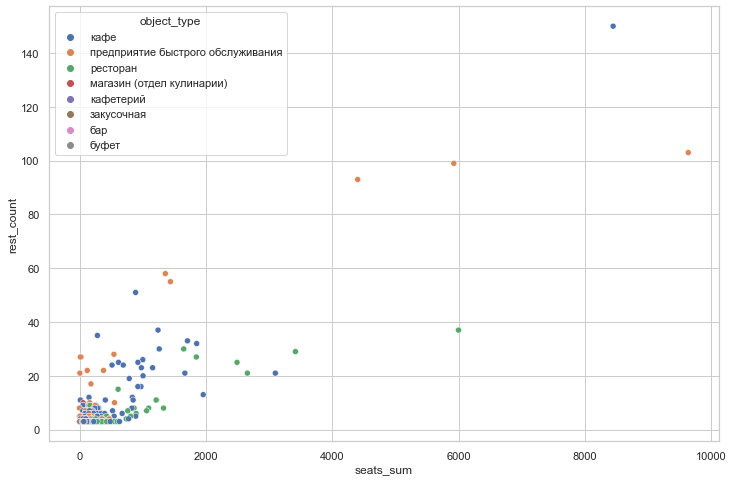

In [19]:
sns.scatterplot(data=rest_chain, x='seats_sum', y='rest_count', hue='object_type')
plt.show()

**Вывод**

На графике представлены соотношения количества посадочных мест суммарно к количнеству сетевых объектов общественного питания по типу.

Так, большинство заведений группируються около нуля, то есть имеют небольшую сеть с малым количеством посадочных мест. Однако, ряд предприятий фастфуда (не более пяти объектов), кафе (не более четырех объектов) и ресторанов (не более трех объектов) имеют, как значительное количество заведений в сети

In [20]:
rest_chain_many_rest = (
    rest_chain[(rest_chain['rest_chain_category'] == 'много заведений') & 
                   (rest_chain['rest_chain_seats_category'] == 'мало мест')]
)

rest_chain_many_rest

,object_name,object_type,rest_count,seats_sum,rest_chain_category,rest_chain_seats_category
17,милти,магазин (отдел кулинарии),27,26,много заведений,мало мест
18,милти,предприятие быстрого обслуживания,27,14,много заведений,мало мест
28,суши wok,предприятие быстрого обслуживания,22,122,много заведений,мало мест
30,кофе с собой,предприятие быстрого обслуживания,21,6,много заведений,мало мест
35,папа джонс,предприятие быстрого обслуживания,17,181,много заведений,мало мест
41,cofix,кафе,12,150,много заведений,мало мест
45,кофе с собой,кафетерий,11,16,много заведений,мало мест
47,кофе с собой,кафе,11,14,много заведений,мало мест
49,сабвей,предприятие быстрого обслуживания,10,161,много заведений,мало мест
50,суши wok,магазин (отдел кулинарии),10,57,много заведений,мало мест


**Вывод**

В таблтицы представлены сетевые заведения сгруппированные по признаку "много заведений - мало мест". Лидерами, при такой группировке являются сети "Милти",  "Суши WOK", "Кофе с собой", "Папа Джонс". Аутсайдерами - "Пицца Хат", "Суши сет", "Братья Караваевы", "Пицца экспресс", "Теремок".

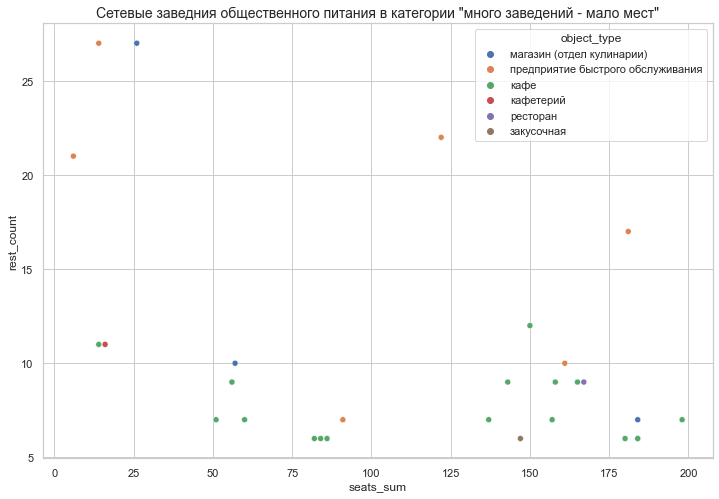

In [21]:
sns.scatterplot(data=rest_chain_many_rest, x='seats_sum', y='rest_count', hue='object_type')
plt.title('Сетевые заведния общественного питания в категории "много заведений - мало мест"', fontsize=14)
plt.show()

**Вывод**

На графике представлено отношениесумаррного количества посадочных мест к количеству объектов общественного питания в сети с разбивкой по типу заведния, в категории "много заведений - мало мест".

Итак, больше всего сетевых заведений у сети в категории фастфуд и кулинария, больше всего суммарных посадочных мест у объектов в категории кафе, кулинария, фастфуд.

In [22]:
rest_chain_few_rest = (rest_chain[(rest_chain['rest_chain_category'] == 'мало заведений') & 
                   (rest_chain['rest_chain_seats_category'] == 'много мест')])

rest_chain_few_rest

,object_name,object_type,rest_count,seats_sum,rest_chain_category,rest_chain_seats_category
94,кафе «андерсон»,кафе,5,548,мало заведений,много мест
95,шоколадница,ресторан,5,340,мало заведений,много мест
97,мимино,кафе,5,284,мало заведений,много мест
100,вьеткафе,кафе,5,264,мало заведений,много мест
103,кафе «му-му»,кафе,5,890,мало заведений,много мест
104,жан жак,кафе,5,338,мало заведений,много мест
108,ресторан «чайхона №1»,ресторан,5,809,мало заведений,много мест
109,кафе «теремок»,предприятие быстрого обслуживания,5,271,мало заведений,много мест
110,гамбринус,ресторан,5,430,мало заведений,много мест
111,академия,кафе,5,280,мало заведений,много мест


**Вывод**

Аналогичные расчеты произведены для категории "мало заведений - много мест". Так, лидерами списка объявляються Кафе "Андерсон", "Шоколадница", "Мимино", "Вьеткафе" и кафе "Му-Му", замыкают список - сети "Нияма", "вареничная № 1", "Космик", Кафе "Пронто", "трритори", "Тануки".

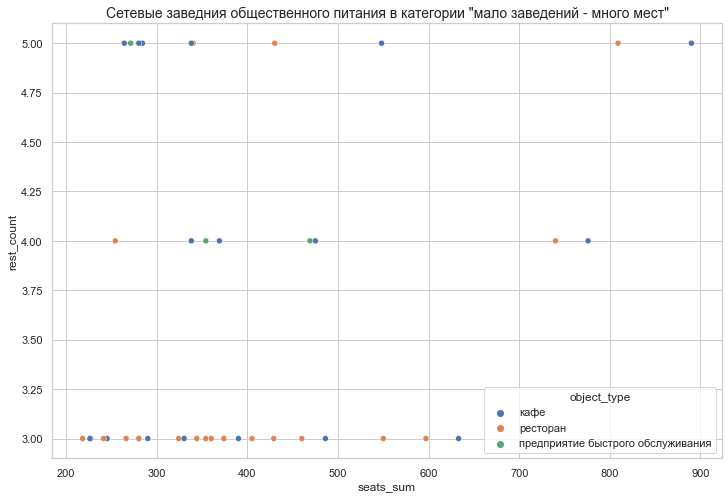

In [23]:
sns.scatterplot(data=rest_chain_few_rest, x='seats_sum', y='rest_count', hue='object_type')
plt.title('Сетевые заведния общественного питания в категории "мало заведений - много мест"', fontsize=14)
plt.show()

**Вывод**

На графике представлены отношения суммарного количества посадочных мест к количеству сетевых объектов общественного питания в категории "мало заведений - много мест".

Так, больше всего мест и объектов у типа сетевого заведния кафе и рестораны, в меньший степени в категории "мало заведений - много мест" представлены предприятия быстрого питания.

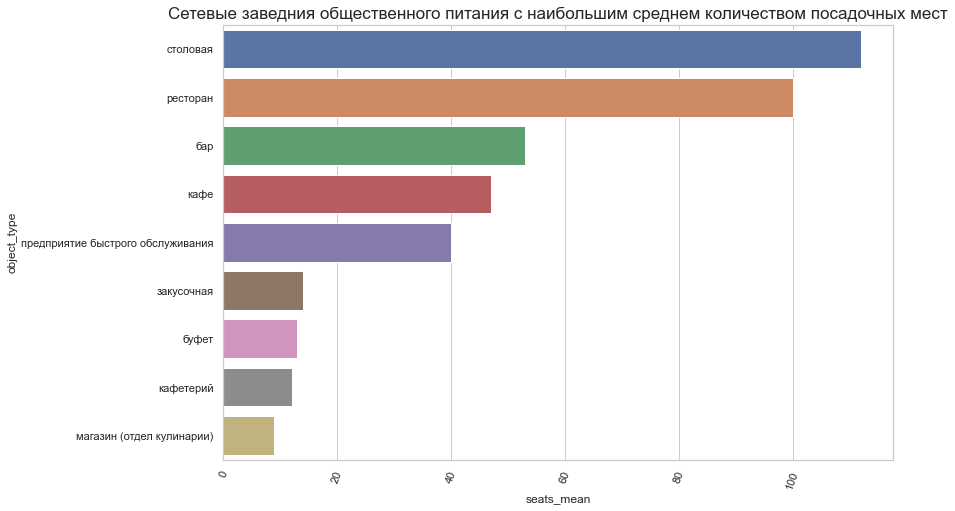

In [24]:
sns.barplot(data=rest_chain_type_seats,  x='seats_mean', y='object_type')
plt.xticks(rotation=70)
plt.title('Сетевые заведния общественного питания с наибольшим среднем количеством посадочных мест', fontsize=17)
plt.show()

**Вывод**

На графике представлено распределение среденего количества посадочных мест по типам сетевых заведений общественного питания.

Так, лидерами отрасли по числу средних посадчных мест на заведение являются столовые и рестораны, аутсайдерами, - закусочные, буфеты, кафетерии и кулинарии.

### Выделите в отдельный столбец информацию об улице из столбца

In [25]:
df['street'] = df['address'].str.split(',').str[1].str.strip()

rest_moscow = df[(df['street'] != 'город Зеленоград') & (df['street'] != 'поселение Сосенское')]

rest_moscow.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,0,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,0,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,0,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,1,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,0,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


### Постройте график топ-10 улиц по количеству объектов общественного питания 

In [26]:
rest_street_top_10 = (
    rest_moscow.groupby('street', as_index=False)['id'].count()
    .rename(columns={'id': 'rest_count'})
    .sort_values('rest_count', ascending=False)
    .head(10)
    .reset_index(drop=True)
    )

rest_street_top_10

,street,rest_count
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


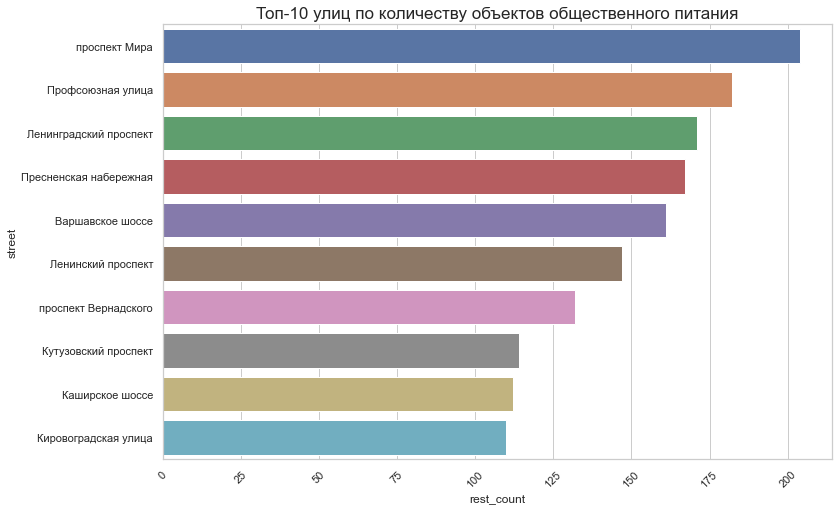

In [27]:
sns.barplot(data=rest_street_top_10, y='street', x='rest_count')
plt.xticks(rotation=45)
plt.title('Топ-10 улиц по количеству объектов общественного питания', fontsize=17)
plt.show()

**Вывод**

В топ-10 улиц Москвы по кличеству заведений общественного питания входят улицы с числом объектов от 110, - Кировоградская улица до максимальной отметки в 204 заведения, - проспект Мира. 

### Найдите число улиц с одним объектом общественного питания

In [29]:
single_rest_street = (
    df.groupby('street')['id'].count()
    .to_frame()
    .loc[lambda x: x['id'] == 1]
    .reset_index()
    .rename(columns={'id': 'rest_count'})
)

single_rest_street.shape[0]

579

**Вывод**

Итак, в Москве 579 улиц с одним объектом общественного питания.

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [30]:
rest_top_10_streets_seats = (
    rest_moscow.groupby('street', as_index=False)['id'].count()
    .sort_values('id', ascending=False)
    .head(10)
    .rename(columns={'id': 'rest_count'})
    .merge(df, on='street')
    .sort_values('rest_count', ascending=False)
    .pivot_table(index='street', columns='object_type', values='number', aggfunc='count')
    .fillna('0')
    .astype(int)
)

rest_top_10_streets_seats

object_type,бар,буфет,закусочная,кафе,кафетерий,магазин (отдел кулинарии),предприятие быстрого обслуживания,ресторан,столовая
street,,,,,,,,,
Варшавское шоссе,6,6,2,63,8,2,40,9,25
Каширское шоссе,2,3,0,30,8,0,43,9,17
Кировоградская улица,4,1,4,17,2,3,47,18,14
Кутузовский проспект,6,1,2,41,0,2,8,48,6
Ленинградский проспект,10,6,0,70,3,5,16,48,13
Ленинский проспект,6,1,1,64,3,0,9,37,26
Пресненская набережная,5,1,0,98,5,0,18,40,0
Профсоюзная улица,5,5,2,90,10,2,23,31,14
проспект Вернадского,4,5,2,56,3,2,27,19,14


**Выводы**

1. Больше всего посадочных мест на улицах с наибольшей концентрацией заведений общественного питания приходиться на кафе: от 41 места на Кутозовском проспекте до 103 мест на проспекте Мира.
2. Конкурировать с кафе по количеству посадочных мест могут предприятия быстрого обслуживания с максимальным количесвом посадочных мест в 40 на Варшавском шоссе и рестораны, - 48 мест на Кутозовском и Ленинградском проспектах, а также столовая в городе Зеленограде с 87 посадочными местами.
3. В то же время, в кулинариях на Ленинсоком проспекте, Пресненской набережной и в поселении Сосенское, в закусочных на Ленинском проспекте, Пресненской набережной и городе Зеленограде, а также кулинариях на Ленинском проспекте, Пресненской набережной и поселении Сосенское вообще не предусмотрено посадочных мест.
4. Однако, в кафе, ресторанах и столовых расположенных в тех же самых локациях посадочных мест вполне достаточно. Так, на Ленинском проспекте в кафе 64 места, в ресторанах 48, в столовых 26; на Пресненской набережной в кафе 98 мест, в ресторанах 40 мест, на Кутузовский проспекте кафе - 41 место, ресторан 48 мест.
5. Распределение мест в барах и буфетах схожее. Так, максимальное количество посадочных мест в 15 в барах на проспекте Мире, что соответсвует 3 местам в буфете, 10 барных мест в городе Зеленограде соответсвует 4 местам в буфете и 10 мест в баре на Ленинградском проспекте соответсвуют 6 местам в будете.

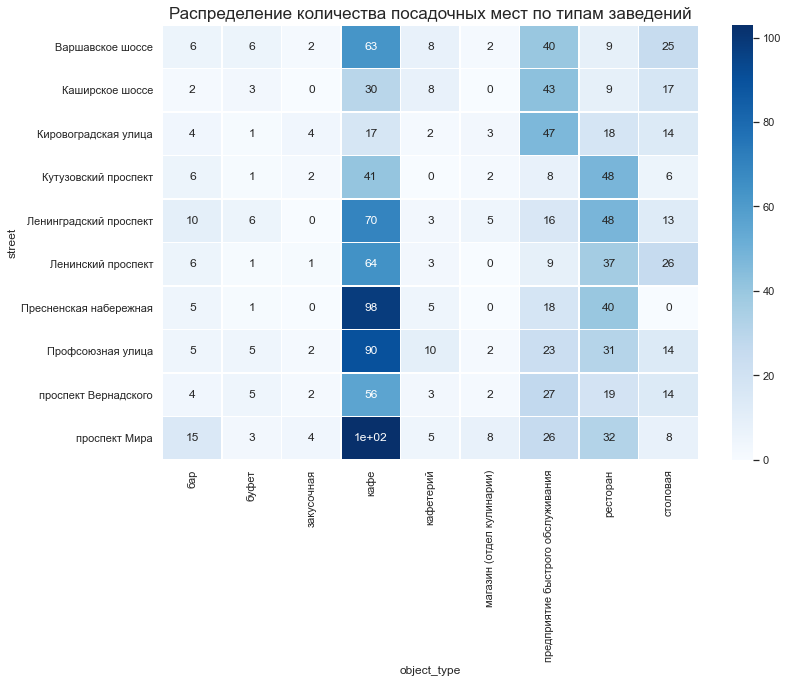

In [31]:
sns.heatmap(rest_top_10_streets_seats, annot=True, linewidths=.5, cmap='Blues')
plt.title('Распределение количества посадочных мест по типам заведений', fontsize=17)
plt.show()

**Вывод**

На графике представлена концентрация посадочных мест по типам заведений и улицам, с наибольшим количеством заведений.

In [32]:
rest_street_top_10_seats_sum = (
    rest_moscow.groupby('street').agg({'id': 'count', 'number': 'sum'})
    .rename(columns={'id': 'rest_count', 'number': 'seats_sum'})
    .sort_values('rest_count', ascending=False)
    .head(10)
    .reset_index()
)

rest_street_top_10_seats_sum

,street,rest_count,seats_sum
0,проспект Мира,204,12790
1,Профсоюзная улица,182,8447
2,Ленинградский проспект,171,9010
3,Пресненская набережная,167,7656
4,Варшавское шоссе,161,8513
5,Ленинский проспект,147,9330
6,проспект Вернадского,132,8840
7,Кутузовский проспект,114,9697
8,Каширское шоссе,112,6171
9,Кировоградская улица,110,6577


,seats_sum
count,10.000000
mean,8703.100000
std,1835.649958
min,6171.000000
25%,7853.750000
50%,8676.500000
75%,9250.000000
max,12790.000000


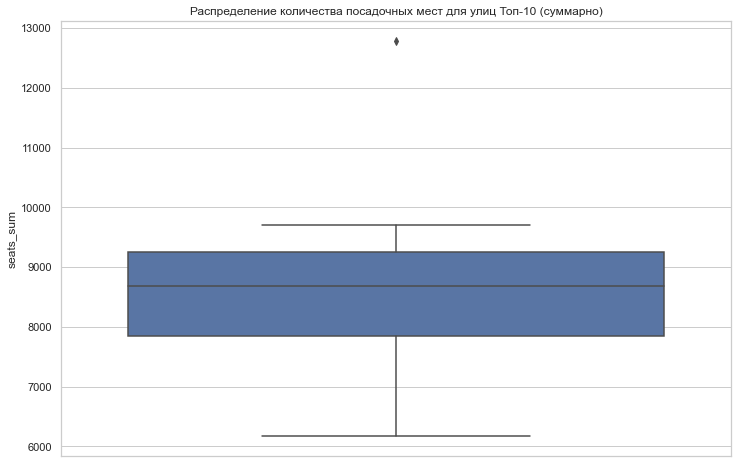

In [33]:
display(rest_street_top_10_seats_sum.seats_sum.describe().to_frame())

sns.boxplot(data=rest_street_top_10_seats_sum, y='seats_sum')
plt.title('Распределение количества посадочных мест для улиц Топ-10 (суммарно)')
plt.show()

**Вывод**

Медиана в 8676,5 мест, среднее в 8703,1 мест, а также стандартное отклонение в 1835,64 мест по отношению к размаху выборе от минимального значения в 6171 место  до максимального в 12790 мест, в совакупности свидетельствует о достаточно плотном ("узком") распределении вокруг среднего, а также о нормальности распределения призанка с "жирным" хвостом в 12790 на проспекте Мира.

# Вывод

Настоящее исследование посвящено анализу данных об объектах общественного питания города Москвы. Целью анализа выступает подбор оптимального типа объекта питания, место расположения объекта и определения количества посадочных мест в планируем к запуску заведению общественного питания. 

Для этого в работе проанализированы объекты общественного питания по типу, по принадлдености к сети, локации и количеству посадочных мест.В отдельный кластер выделены и проанализированы сетевые объекты общественного питания, улицы и района с наибольшей концентрацией заведений общественного питания, заведения с наибольшим средним чилом посадочных мест.

Автор работы пришел следующим выводам:

1. Объекты питания представлены в виде кафе, столовых, ресторанов, предприятий фастфуда, баров, буфетов, кафетерий, закосочных и отделов кулинарии. Подавляющее большинство объектов общественного питания представленов в качестве кафе - 6099 заведений, что составлет 40% рынка. Практически в равных количествах представлены столовые и рестораны, 2587 и 2285 соответсвенно, что суммарно составляет 32% рынка. В меньшем размере представлены категории кафетерий, закусочных и отделов кулинарии, 398, 360 и 273 соответвенно, что суммарно составляет 7% рынка.

2. Несетевые заведения составляют 81% рынка или 12398 объектов, сетевые заведения 19% рынка или 2968 объектов.

3. 47% или 1396 объекта сетевых зававедений представлено в качестве кафе. В схожих объемах, 27% и 18% сетвых заведений представлено в качестве предприятий фастфуда и ресторанов, что составляет 791 и 544 объекта соответсвенно. Из сетевых заведений наименьших процент рынка (суммарно менее 2%) занимают бары, буфеты и столовые 37, 11 и 3 соответсвенно.

4. Явного паттерна по количеству заведений и среднему количеству посадочных мест для сетевых завелений выявить не представляеться возможным. Так, сетевые столовые представлены в количенстве трех заведений, при этом среднее количество посадочных мест составляет 112, в то же время сопоставимые по количеству средних посадочных мест на заведение - 100, сетевые рестораны имеют 544 заведения. Кафе, - 1396 сетевых заведения имеют в среднем 47 посадочных мест, а сетевые бары, со среднем сопоставимым с кафе количеством посадочных мест в 53 имеют лишь 37 заведния. Итого, при увеличении количества заведений в сети, до определенного уровня, растет и среднее количество посадочных мест, что характерно для предприятий фастфуда, кафе и ресторанов. В то же время, для кунирий, баров и столовых не характерно увеличение количества заведений в сети, размер среднего количество мест определяеться изначальным планом рассадки клиентов. Лидерами отрасли по числу средних посадчных мест на заведение являются столовые и рестораны, аутсайдерами, - закусочные, буфеты, кафетерии и кулинарии.

5. В топ-10 улиц Москвы по кличеству заведений общественного питания входят улицы с числом объектов от 114, - Кутозовский проспект до максимальной отметки в 232 заведения, - город Зеленоград. Больше всего заведений сконцентрировано в Обручевском, Донском, Гагаринском, Ломоносовском районах, районе Теплый Стан и Проспект Вернадского. Меньше всего объектов в районе Якиманка, Раменском, Фили-Давыдково, Дорогомирово и поселении Сосенское. Улицы с одном объектом питания сосредоточены в 98 районах Москвы. Наибольшая концентрация улиц с одним объектом общественного питания характерана для Таганского района, района Хамовники, Басманного, Тверского и Пресненских районов.

6. Больше всего посадочных мест на улицах с наибольшей концентрацией заведений общественного питания приходиться на кафе: от 41 места на Кутозовском проспекте до 103 мест на проспекте Мира. Конкурировать с кафе по количеству посадочных мест могут предприятия быстрого обслуживания с максимальным количесвом посадочных мест в 40 на Варшавском шоссе и рестораны, - 48 мест на Кутозовском и Ленинградском проспектах, а также столовая в городе Зеленограде с 87 посадочными местами. В то же время, в кулинариях на Ленинсоком проспекте, Пресненской набережной и в поселении Сосенское, в закусочных на Ленинском проспекте, Пресненской набережной и городе Зеленограде, а также кулинариях на Ленинском проспекте, Пресненской набережной и поселении Сосенское вообще не предусмотрено посадочных мест. Однако, в кафе, ресторанах и столовых расположенных в тех же самых локациях посадочных мест вполне достаточно. Так, на Ленинском проспекте в кафе 64 места, в ресторанах 48, в столовых 26; на Пресненской набережной в кафе 98 мест, в ресторанах 40 мест, на Кутузовский проспекте кафе - 41 место, ресторан 48 мест. Распределение мест в барах и буфетах схожее. Так, максимальное количество посадочных мест в 15 в барах на проспекте Мире, что соответсвует 3 местам в буфете, 10 барных мест в городе Зеленограде соответсвует 4 местам в буфете и 10 мест в баре на Ленинградском проспекте соответсвуют 6 местам в будете.

Таким образом, следуя трендам рынка общественного питания целесообразно развивать проект в форме сетевого кафе, с количеством посадочных мест от 41 до 103, расположить в районах Обручевский, Теплый Стан, Донской район, Проспект Вернадского, Гагаринский, Ломоносовский район	и район Тропарево-Никулино.

**Презентация**

<https://yadi.sk/i/wmcoXqdQnBzA3A>